<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2022/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.color import rgb2gray, rgba2rgb

### noisy image를 가져오기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


(448, 464) uint8


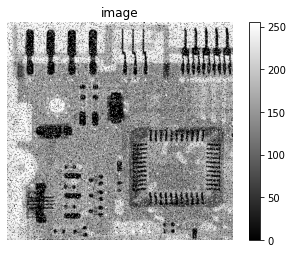

In [2]:
img_url = 'https://raw.githubusercontent.com/hufsaim/T10306201/master/image/circuitboard-saltandpep.tif'
img = rgb2gray(io.imread(img_url))
print(img.shape,img.dtype)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('image')
plt.show()

### 2D median filtering
- 다음은 3x3 크기의 neighborhood를 이용한 median filtering을 수행하는 함수를 구현한 것이다. 
- 정의된 함수는 padding을 사용하지 않고, 가장자리에 대해서는 0를 출력하도록 구현되어 있다.


In [3]:
def MyMedianFilter(I):
  y = np.zeros_like(I)
  for i in np.arange(1,y.shape[0]-1):
    for j in np.arange(1,y.shape[1]-1):
      y[i,j] = np.median(I[i-1:i+2,j-1:j+2])
  return y

### 정의한 함수에 image를 넣어 filtered image를 얻자.

In [4]:
g_median = MyMedianFilter(img)

### noisy image와 filtered image를 비교하기

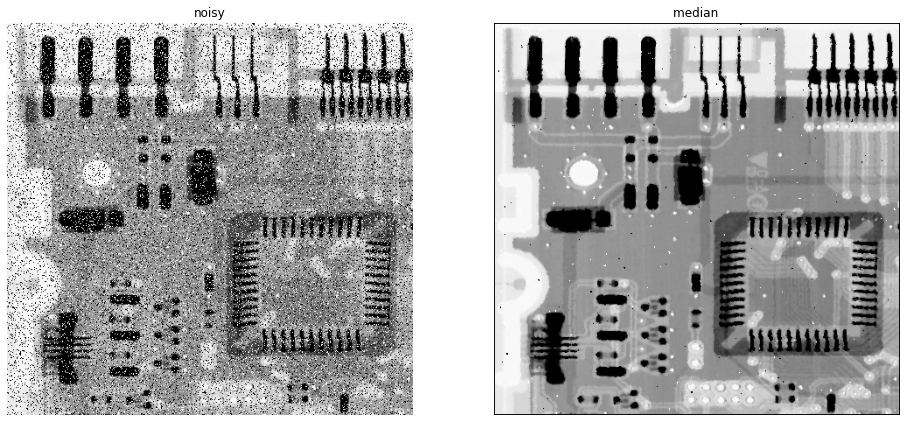

In [5]:
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('noisy')
plt.subplot(122)
plt.imshow(g_median,cmap='gray')
plt.axis('off')
plt.title('median ')
plt.show()


### 새로운 image 가져오기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


(538, 464) uint8


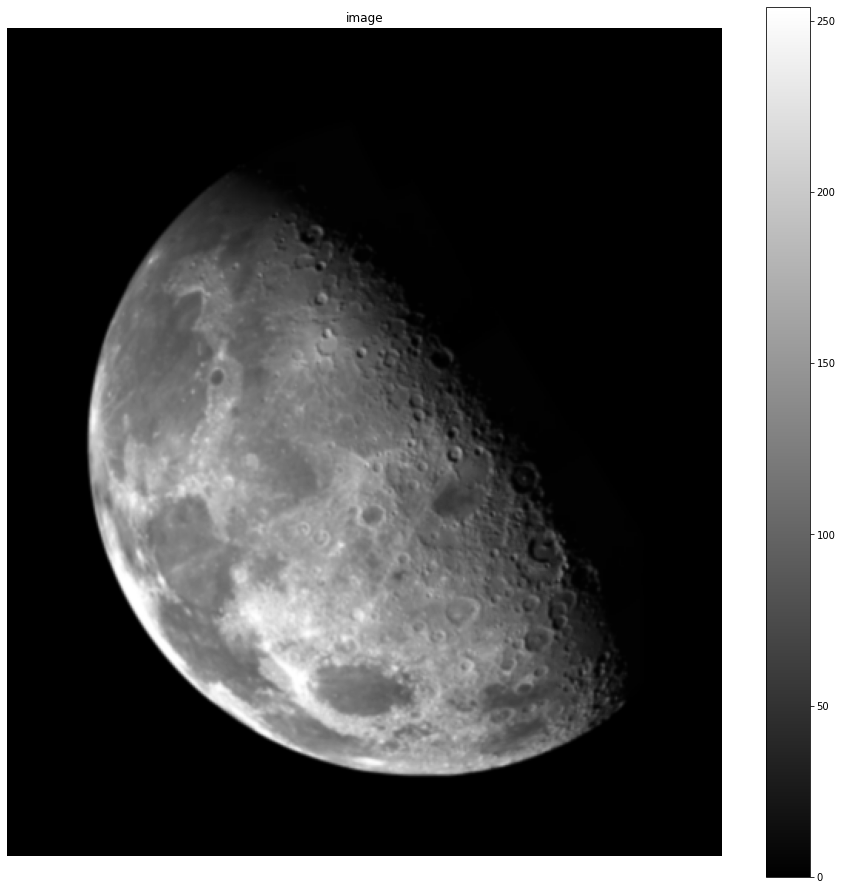

In [6]:
img_url = 'https://raw.githubusercontent.com/hufsaim/T10306201/master/image/moon-blurred.tif'
img = rgb2gray(io.imread(img_url))
print(img.shape,img.dtype)
plt.figure(figsize=(16,16))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('image')
plt.colorbar()
plt.show()


### 3x3 크기의 kernel을 통한 2D convolution을 하는 함수를 정의하기

In [7]:
def MyConvFilter(I,w):
  I = I.astype(np.float64)
  y = np.zeros_like(I)
  for i in np.arange(1,y.shape[0]-1):
    for j in np.arange(1,y.shape[1]-1):
      y[i,j] = np.sum(I[i-1:i+2,j-1:j+2]*w[::-1,::-1])
  return y

### Laplacian kernel을 정의하기

In [8]:
w = np.array([[0,1,0],[1,-4.,1],[0,1,0]])
print(w)

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


### 정의한 함수에 image와 kernel을 넣어 filtered image를 얻고 결과를 확인하기

In [9]:
g_hp = MyConvFilter(img,w)
print(g_hp.dtype,g_hp.shape)

float64 (538, 464)


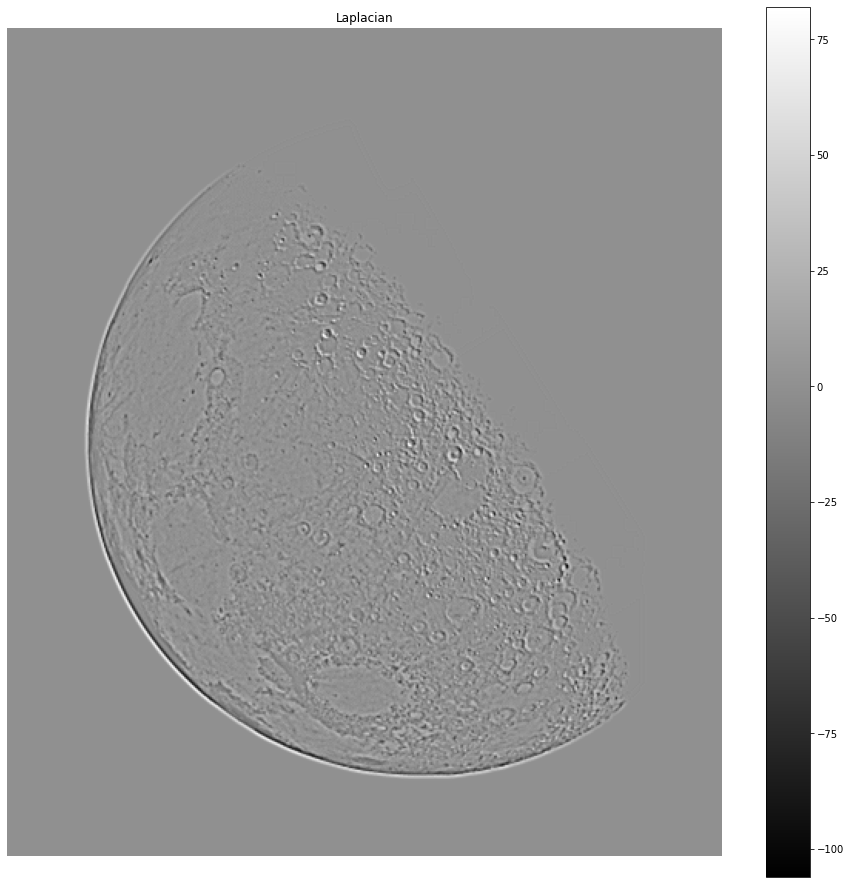

In [10]:
plt.figure(figsize=(16,16))
plt.imshow(g_hp,cmap='gray')
plt.axis('off')
plt.title('Laplacian')
plt.colorbar()
plt.show()